# Tensor Products

**Companion notebook for:** [`tensor-product-intuition.md`](./tensor-product-intuition.md)

This notebook demonstrates:
- How multiple qubits combine via tensor products
- Exponential growth of state space
- Separable vs entangled states
- Why you can't think of qubits individually

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

np.set_printoptions(precision=3, suppress=True)

## 1. Exponential State Space Growth

1 qubit: 2 basis states  
2 qubits: 4 basis states  
3 qubits: 8 basis states  
...

n qubits: 2^n basis states

In [2]:
# Compare state space sizes
for n in range(1, 6):
    qc = QuantumCircuit(n)
    state = Statevector(qc)
    print(f"{n} qubit(s): {len(state.data)} complex amplitudes")

print("\nGrowth is exponential!")
print("50 qubits → 2^50 ≈ 10^15 amplitudes")
print("That's more than atoms in your body.")

1 qubit(s): 2 complex amplitudes
2 qubit(s): 4 complex amplitudes
3 qubit(s): 8 complex amplitudes
4 qubit(s): 16 complex amplitudes
5 qubit(s): 32 complex amplitudes

Growth is exponential!
50 qubits → 2^50 ≈ 10^15 amplitudes
That's more than atoms in your body.


## 2. Tensor Product in Action

|0⟩ ⊗ |0⟩ = |00⟩  
|0⟩ ⊗ |1⟩ = |01⟩  
etc.

In [3]:
# Manual tensor product
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

state_00 = np.kron(ket0, ket0)
state_01 = np.kron(ket0, ket1)
state_10 = np.kron(ket1, ket0)
state_11 = np.kron(ket1, ket1)

print("|00⟩ =", state_00)
print("|01⟩ =", state_01)
print("|10⟩ =", state_10)
print("|11⟩ =", state_11)

# Using Qiskit
qc = QuantumCircuit(2)
state_qiskit = Statevector(qc)
print("\nQiskit |00⟩:", state_qiskit.data)
print("\n→ Same thing!")

|00⟩ = [1 0 0 0]
|01⟩ = [0 1 0 0]
|10⟩ = [0 0 1 0]
|11⟩ = [0 0 0 1]

Qiskit |00⟩: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]

→ Same thing!


## 3. Separable States

Some 2-qubit states can be written as a product of single-qubit states.

In [4]:
# Create |+⟩ ⊗ |0⟩
qc = QuantumCircuit(2)
qc.h(0)  # First qubit in |+⟩
# Second qubit stays in |0⟩

state = Statevector(qc)
print("State vector:", state.data)
print("\nThis is |+⟩ ⊗ |0⟩ = (|0⟩ + |1⟩)/√2 ⊗ |0⟩")
print("            = (|00⟩ + |10⟩)/√2")
print("\n→ This is SEPARABLE.")
print("→ We can describe each qubit independently.")
print("→ Qubit 0 is in |+⟩, qubit 1 is in |0⟩.")

State vector: [0.707+0.j 0.707+0.j 0.   +0.j 0.   +0.j]

This is |+⟩ ⊗ |0⟩ = (|0⟩ + |1⟩)/√2 ⊗ |0⟩
            = (|00⟩ + |10⟩)/√2

→ This is SEPARABLE.
→ We can describe each qubit independently.
→ Qubit 0 is in |+⟩, qubit 1 is in |0⟩.


## 4. Joint vs Individual States

For separable states, we can factor the joint state.

In [5]:
# Create |+⟩ ⊗ |−⟩
qc = QuantumCircuit(2)
qc.h(0)  # First qubit: |+⟩
qc.h(1)  # Second qubit: |+⟩
qc.z(1)  # Apply Z to make it |−⟩

state = Statevector(qc)
print("Joint state:", state.data)
print("\nThis factorizes as:")
print("|+⟩ ⊗ |−⟩ = [(|0⟩ + |1⟩)/√2] ⊗ [(|0⟩ - |1⟩)/√2]")
print("          = (|00⟩ - |01⟩ + |10⟩ - |11⟩)/2")
print("\nProbabilities:")
print(state.probabilities_dict())
print("\n→ For separable states:")
print("  P(00) = P(0 on qubit 0) × P(0 on qubit 1)")
print("  P(00) = 0.5 × 0.5 = 0.25 ✓")

Joint state: [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]

This factorizes as:
|+⟩ ⊗ |−⟩ = [(|0⟩ + |1⟩)/√2] ⊗ [(|0⟩ - |1⟩)/√2]
          = (|00⟩ - |01⟩ + |10⟩ - |11⟩)/2

Probabilities:
{np.str_('00'): np.float64(0.2499999999999999), np.str_('01'): np.float64(0.2499999999999999), np.str_('10'): np.float64(0.2499999999999999), np.str_('11'): np.float64(0.2499999999999999)}

→ For separable states:
  P(00) = P(0 on qubit 0) × P(0 on qubit 1)
  P(00) = 0.5 × 0.5 = 0.25 ✓


## 5. Visualizing Multi-Qubit States

The Bloch sphere doesn't work for multiple qubits.  
We need other visualizations.

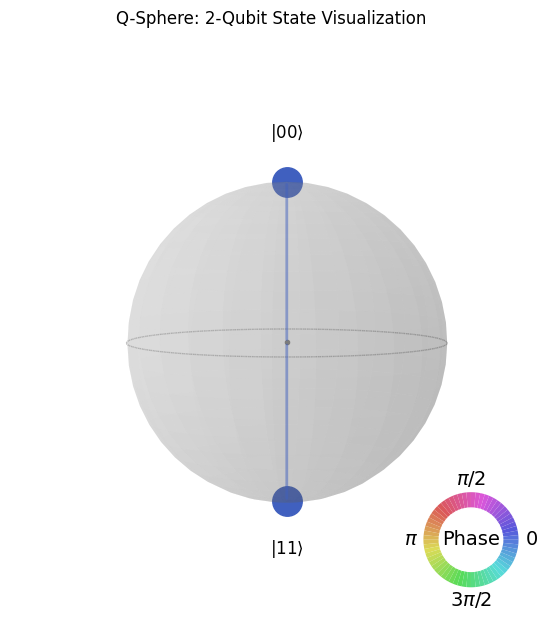

State: [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]

Each point represents a basis state |00⟩, |01⟩, |10⟩, |11⟩
Size of dot = probability
Color = phase


: 

In [ ]:
from IPython.display import display

# Q-sphere visualization for 2 qubits
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Creates entanglement (we'll cover this next)

state = Statevector(qc)
fig = plot_state_qsphere(state)
fig.suptitle('Q-Sphere: 2-Qubit State Visualization')

display(fig)  # ensure the figure renders even with prints below

print("State:", state.data)
print("\nEach point represents a basis state |00⟩, |01⟩, |10⟩, |11⟩")
print("Size of dot = probability")
print("Color = phase")


## Summary

From this notebook, you should understand:

1. **Exponential growth** — n qubits need 2^n amplitudes
2. **Tensor products** — how individual qubit states combine
3. **Separable states** — can be written as products
4. **Joint state** — one vector describes the entire system
5. **Visualization breaks** — no Bloch sphere for multiple qubits

**Next:** [Entanglement](./entanglement.ipynb)  
Where we'll see states that cannot be factored.